In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[1, 0, 0, 4, 3, 4, 7, 15, 12, 34, 44, 54, 63, 105, 95, 150, 177, 229, 294, 318, 407, 434, 461, 538, 504, 585, 550, 558, 547, 526, 502, 438, 436, 340, 310, 305, 213, 213, 134, 101, 91, 59, 49, 26, 17, 19, 10, 5, 6, 3, 2, 0, 1, 0, 1]
55
866.0985038838292
[866, 871, 876, 881, 886, 891, 896, 901, 906, 911, 916, 921, 926, 931, 936, 941, 946, 951, 956, 961, 966, 971, 976, 981, 986, 991, 996, 1001, 1006, 1011, 1016, 1021, 1026, 1031, 1036, 1041, 1046, 1051, 1056, 1061, 1066, 1071, 1076, 1081, 1086, 1091, 1096, 1101, 1106, 1111, 1116, 1121, 1126, 1131, 1136]
55


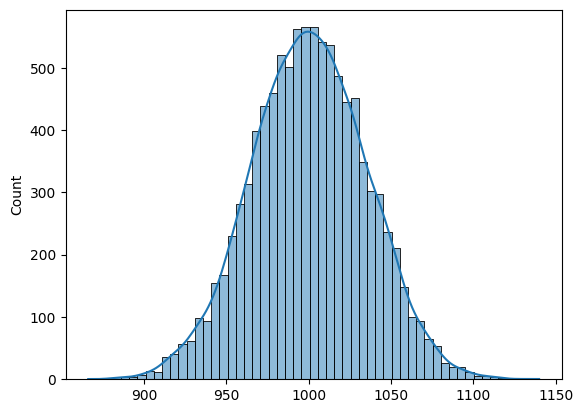

In [209]:
import numpy as np

loc1 = 1000
loc2 = 2000
x = np.random.normal(loc1, 35, 10000)
x = np.sort(x)

sns.histplot(x, binwidth=5, kde=True)

def y_coordinate(x):
    start, step = min(x), 5
    y = []
    count = 0

    for i in sorted(x):
        if start <= i < start + step:
            count += 1
        else:
            while i >= start + step:
                y.append(count)
                start += step
                count = 0
            count += 1
    y.append(count)
    return y

y = y_coordinate(x)
print(y)
print(len(y))
print(x[0])
x1 = [i for i in range(int(x[0]), int(x[-1])+1, 5)]
print(x1)
print(len(x1))
plt.show()

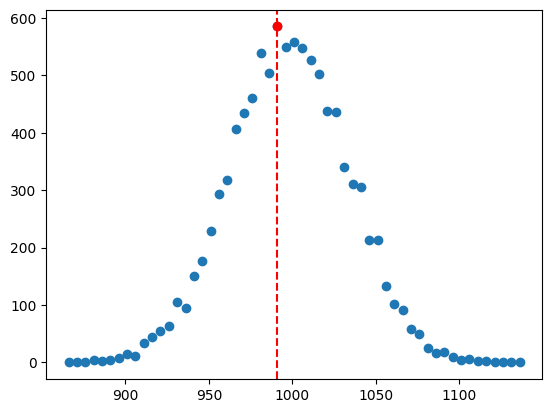

Tepe Noktası X: 991
Tepe Noktası Y: 585


In [210]:
plt.scatter(x1, y)


def simulated_annealing(x, y, initial_temperature=100, cooling_rate=0.95, num_iterations=1000):
    current_solution = np.random.choice(len(x), size=1)[0]
    current_value = y[current_solution]

    best_solution = current_solution
    best_value = current_value

    temperature = initial_temperature

    for _ in range(num_iterations):
        neighbor_solution = np.random.choice(len(x), size=1)[0]
        neighbor_value = y[neighbor_solution]

        if neighbor_value > current_value or np.random.rand() < np.exp((neighbor_value - current_value) / temperature):
            current_solution = neighbor_solution
            current_value = neighbor_value

            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value

        temperature *= cooling_rate

    return x[best_solution], y[best_solution]

x1, y1 = simulated_annealing(np.array(x1), np.array(y))
plt.scatter(x1, y1, c="red")
plt.axvline(x=x1, ls='--', color='red')
plt.show()
print("Tepe Noktası X:", x1)
print("Tepe Noktası Y:", y1)